In [ ]:
# 2017 S2 FIT5211 Assignment 1
# Duo Pan
# 27554074

In [1]:
# Q1. Point ADT class

class Point:
    # constructor
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # distance to (0,0)
    def distance_from_origin(self):
        return sqrt(self.x * self.x + self.y * self.y)
    
    # normal distance between self and other point
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return sqrt(dx * dx + dy * dy)
    
    # reset x,y after translate
    def translate(self, dx, dy):
        self.x += dx
        self.y += dy
    
    # make it can be printed as a string
    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
    
    # make the class can be compare, and it makes sort easily.
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):
        return self.x > other.x or (self.x == other.x and self.y > other.y)
    
    def __lt__(self, other):
        return self.x < other.x or (self.x == other.x and self.y < other.y)
    
    # Manhattan distance
    def manhattan(self, other):
        return abs(self.x - other.x) + abs(self.y - other.y)


In [2]:
# Q2. PointSet ADT class
# init, insert, delete methods and other auxiliary methods

class PointSet:
    # constructor
    def __init__(self, init=None):
        if init is None:
            self.contents = []
        else:
            self.contents = init  
    
    # get length
    def __len__(self):
        return len(self.contents)
    
    # print all points in this set
    def display(self):
        for item in self.contents:
            print(item)
    
    # is empty
    def is_empty(self):
        return self.contents == []
    
    # binary search, get the right index, called by insert() and remove()
    # return index and 0/1, 0 means not find, 1 means find
    def findPosition(self, elem):
        low = 0  
        high = len(self) - 1  
        while low <= high:  
            mid = (high + low) // 2  
            if self.contents[mid] == elem:  
                return mid, 1  
            elif self.contents[mid] > elem:  
                high = mid - 1  
            else:  
                low = mid + 1  
        return low, 0
    
    # insert Point by x ascending order first, then y ascending
    def insert(self, elem):
        index, isfind = self.findPosition(elem)  
        if isfind == 1:
            # do not accept 2 points with the same x,y
            return False
        else:
            self.contents.insert(index, elem) 
            return True
    
    # remove elem from the set
    def remove(self, elem):
        index, isfind = self.findPosition(elem) 
        if isfind == 1:
            self.contents.pop(index)
        else:
            print(elem,end=' ')
            print("is not in the set")
        
    # clear the point set
    def removeAll(self):
        self.contents = []
            
    # get x list, used for plot
    def getXS(self):
        xs = []
        for item in self.contents:
            xs.append(item.x)
        return xs
     
    # get y list, used for plot
    def getYS(self):
        ys = []
        for item in self.contents:
            ys.append(item.y)
        return ys      

    

In [3]:
# Q3a. brute-force
# two loops, compare all point pairs

def closestDisByBF(points):
    if len(points) < 2:
        print("Please make sure there are more than 2 points in the set.")
        return
    minDis = float('inf')
    for i in range(0,len(points)):
        for j in range(i+1,len(points)):
            curDis = points.contents[i].manhattan(points.contents[j])
            if minDis > curDis:
                minDis = curDis
                P = Point(points.contents[i].x, points.contents[i].y)
                Q = Point(points.contents[j].x, points.contents[j].y)
    return minDis, P, Q

In [4]:
# Q3b. divide-and-conquer
# The same algorithm as lecture notes
# Input: all the points are sorted by x,y ascending already

def closestDisByDC(points):
    n = len(points)
    if n <= 3:
        return closestDisByBF(points)
       
    left, right = PointSet(points.contents[0:n//2]), PointSet(points.contents[n//2:])
    mid_line_x = (left.contents[-1].x + right.contents[0].x) / 2
     
    # divide and conquer
    d_min_left, left_point_1, left_point_2 = closestDisByDC(left)
    d_min_right, right_point_1, right_point_2 = closestDisByDC(right)
    if(d_min_left < d_min_right):
        d_min = d_min_left
        point_1 = left_point_1
        point_2 = left_point_2
    else:
        d_min = d_min_right
        point_1 = right_point_1
        point_2 = right_point_2
    
    # handle one point left and one right
    # get two sets
    leftPs = PointSet()
    for i in range(len(left)-1,-1,-1):
        if mid_line_x - left.contents[i].x < d_min:
            leftPs.insert(left.contents[i])
        else:
            break
    rightPs = PointSet()
    for i in range(0,len(right)):
        if right.contents[i].x - mid_line_x < d_min:
            rightPs.insert(right.contents[i])
        else:
            break
    # if one set is empty, I can get answer directly            
    if leftPs.is_empty() or rightPs.is_empty():
        return d_min, point_1, point_2
    else:
        small = d_min
        # new list sort by y
        newPs = leftPs
        for i in range(0,len(rightPs)):
            newPs.insert(rightPs.contents[i])
        
        # compare next 15 points in new point list
        for i in range(0,len(newPs)-1):
            k = 1
            for j in range(i+1,len(newPs)):
                if k >= 15:
                    break
                k += 1
                cur = newPs.contents[i].manhattan(newPs.contents[j])
                if small > cur:
                    small = cur
                    point_1 = Point(newPs.contents[i].x, newPs.contents[i].y)
                    point_2 = Point(newPs.contents[j].x, newPs.contents[j].y)
        return small, point_1, point_2
    

---100 points brute-force demo---
Brute force time is:  0.003896941998391412
Closest Manhattan distance:  6
Two points are:  (860, 1633) and (862, 1629)

---100 points divide-and-conquer demo---
Divide conquer time is:  0.001586850998137379
Closest Manhattan distance:  6
Two points are:  (860, 1633) and (862, 1629)



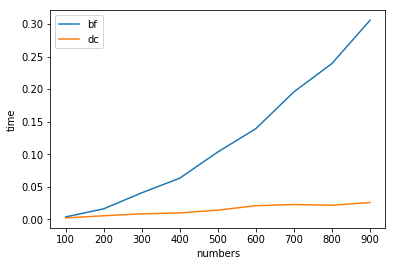

In [10]:
# Q4. Runtime - Empirical Analysis
# runtime evaluation by timeit library
# plot runtime graphs, (time of 100,200,300...900 points)


from math import *
import random
import timeit
import matplotlib.pyplot as plt  


pointSet = PointSet()

# x y range of the points
maxSize = 2000 
# randomly generate some points and store in the set
def createRandomPoints(number):
    ps = PointSet()
    for i in range(0,number):
        point = Point(random.randint(0,maxSize-1),random.randint(0,maxSize-1))
        if ps.insert(point) == False:
            i -= 1
    return ps
    
pointSet = createRandomPoints(100)    


# 100 points brute-force demo
print("---100 points brute-force demo---")
start_time = timeit.default_timer()
dis1, p1, q1 = closestDisByBF(pointSet)
print("Brute force time is: ",timeit.default_timer() - start_time)
print("Closest Manhattan distance: ", dis1)
print("Two points are: ",p1,"and",q1)
print()
# 100 points divide-and-conquer demo
print("---100 points divide-and-conquer demo---")  
start_time = timeit.default_timer()
dis2, p2, q2 = closestDisByDC(pointSet)
print("Divide conquer time is: ",timeit.default_timer() - start_time)
print("Closest Manhattan distance: ", dis2)
print("Two points are: ",p2,"and",q2)
print()

# plot runtime graphs
time_bf = []
time_dc = []
for i in range(100,1000,100):
    pointSet = createRandomPoints(i)
    start_time1 = timeit.default_timer()
    dis1, p1, q1 = closestDisByBF(pointSet)
    time_bf.append(timeit.default_timer() - start_time1)
    start_time2 = timeit.default_timer()
    dis1, p1, q1 = closestDisByDC(pointSet)
    time_dc.append(timeit.default_timer() - start_time2)

plt.plot([x for x in range(100,1000,100)],time_bf, label='bf')
plt.plot([x for x in range(100,1000,100)],time_dc, label='dc')
plt.ylabel('time')
plt.xlabel('numbers')
plt.rcParams['legend.numpoints'] = 1
plt.legend()
plt.show()


#Qeustion: Discuss briefly whether your plots substantiate your expectations.
#Answer:
#    My expectation is that divide-and-conquer algorithm must be much faster than brute-force algorithm.
#    As I known, brute-force runtime T(n)=O(n*n), because there are double layer loops. 
#    While divide-conquer runtime T(n)=O(n*logn), (pre-ordering points).
#    I viewed the figure "Big-O Complexity Chart" provided in week2. And I think my test will looks like that.
#    After ploting: As I expected, my figure substantiates my expectation.


In [ ]:
# Q5.Recurrence Relation
# Q. State the Recurrence relation of D&C and your Brute-Force Implementation 
# if you sort the lists explicitly on each level of the recursion.

# Answer: 
#   First, calculating sorting time of a list. I view the cheatsheet of sorting algorithm: I think Mergesort  
#   is the best choise, because its average and worst time complexity are O(n*logn).

# Brute-Force: Whether sort or not has no impact on the time complexity. 
#              It is always O(n*n), because it has two layer loops.

# D&C: 
# according to lecture notes:
# Before: T(n)=O(n)+2T(n/2)+O(1)+O(n)+O(1) = O(n*logn), based on master theorem.
# Now:    T(n)=O(n)+2T(n/2)+O(1)+O(n)+O(1)+O(n*logn)

# Each level sort time complexity:
#  1：O(n*logn)
#  2: 2*O((n/2)*log(n/2))
#  3: 4*O((n/4)*log(n/4)) 
#  4: 8*O((n/8)*log(n/8)) 
#   ........

# T(n)=O(n*n*logn)




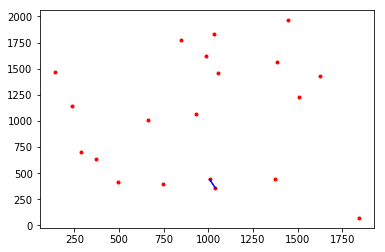

In [7]:
# Q6. Visualisation
# use 20 points to simulate
# Show all points in red and the cloest pair with blue line.

import matplotlib.pyplot as plt

pointSet = createRandomPoints(20)
plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
dis, p, q = closestDisByDC(pointSet)
plt.plot([p.x,q.x],[p.y,q.y],'b')
plt.show()